In [17]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [18]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "planning_budget"
tags = ['2024-04-12-15-31-26']
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [19]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 45/45 [00:00<00:00, 96940.77it/s]


,Training/Value_loss,Training/Policy_loss,Training/Learning_Rate,Self_Play/Discounted_Return,Training/Replay_Buffer_Size,max_Self_Play/Mean_Discounted_Return,Self_Play/Timesteps,Training/Value_and_Policy_loss,_runtime,Evaluation/Entropies,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,0.006771,1.356560,0.001,"{'bins': [0, 0.002595051657408476, 0.005190103...",60,0.122503,"{'bins': [36, 37, 38, 39, 40, 41, 42, 43, 44, ...",0.411708,1114.624695,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
1,0.012446,1.356331,0.001,"{'bins': [0, 0.003716043662279844, 0.007432087...",60,0.118265,"{'bins': [29, 30.109375, 31.21875, 32.328125, ...",0.415612,1166.299293,"{'bins': [0.3871442675590515, 0.40276926755905...",...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
2,0.021292,1.378977,0.001,"{'bins': [-0.6302493214607239, -0.618766129016...",60,0.021073,"{'bins': [10, 11.40625, 12.8125, 14.21875, 15....",0.428597,932.323662,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
3,0.003783,1.364770,0.001,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",60,0.067468,"{'bins': [99.5, 99.515625, 99.53125, 99.546875...",0.412079,689.851566,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
4,0.008963,1.347323,0.001,"{'_type': 'histogram', 'values': [4, 0, 0, 0, ...",60,0.085632,"{'bins': [42, 42.90625, 43.8125, 44.71875, 45....",0.410471,616.441172,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
5,0.053219,1.380933,0.001,"{'bins': [-0.41812023520469666, -0.41143259406...",60,-0.029477,"{'bins': [18, 19.28125, 20.5625, 21.84375, 23....",0.451533,368.771080,"{'bins': [0.4685637354850769, 0.48418873548507...",...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
6,0.002652,1.373134,0.001,"{'bins': [0, 0.00411750003695488, 0.0082350000...",60,0.069687,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.413796,364.728565,"{'bins': [0.07185792922973633, 0.0874829292297...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
7,0.003595,1.370563,0.001,"{'bins': [-0.5, -0.484375, -0.46875, -0.453125...",60,0.041555,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.413685,332.196336,"{'bins': [0.4182952046394348, 0.43392020463943...",...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
8,0.012148,1.385602,0.001,"{'bins': [-0.513342022895813, -0.5053210258483...",60,-0.100505,"{'bins': [14, 15.34375, 16.6875, 18.03125, 19....",0.424184,147.475237,"{'bins': [0.4940145611763001, 0.5096395611763,...",...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity
9,0.002902,1.344002,0.001,"{'bins': [0, 0.003911625128239393, 0.007823250...",60,0.139000,"{'bins': [28, 29.125, 30.25, 31.375, 32.5, 33....",0.405232,1408.546822,"{'bins': [0.3829931616783142, 0.39861816167831...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity


In [20]:
df.columns

Index(['Training/Value_loss', 'Training/Policy_loss', 'Training/Learning_Rate',
       'Self_Play/Discounted_Return', 'Training/Replay_Buffer_Size',
       'max_Self_Play/Mean_Discounted_Return', 'Self_Play/Timesteps',
       'Training/Value_and_Policy_loss', '_runtime', 'Evaluation/Entropies',
       'Evaluation/Discounted_Returns', 'Self_Play/Mean_Discounted_Return',
       'Evaluation/Returns', 'Self_Play/Max_Return', 'Self_Play/Mean_Entropy',
       'max_Evaluation/Mean_Discounted_Returns', 'Self_Play/Returns',
       '_timestamp', 'Self_Play/Min_Timesteps', 'Training/Value_Simularities',
       'Self_Play/EMA_Discounted_Return',
       'max_Self_Play/Mean_Discounted_Return_step', '_wandb',
       'environment_steps', 'Evaluation/Timesteps', 'Self_Play/Min_Return',
       'Self_Play/Mean_Return', 'Self_Play/Mean_Timesteps',
       'Self_Play/Total_Timesteps', 'Self_Play/Total_Mean_Discounted_Return',
       'episodes', 'grad_steps', 'Evaluation/Mean_Returns',
       'Evaluation/Mea

In [21]:
df.discount_factor.unique()


array([0.95])

In [22]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

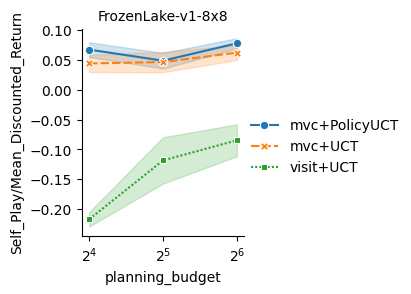

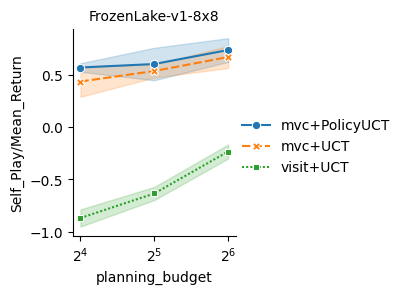

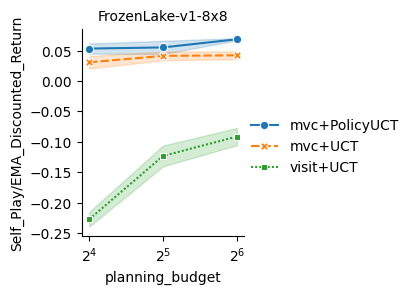

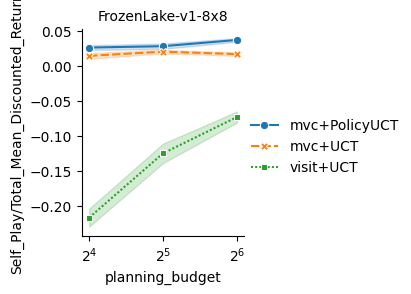

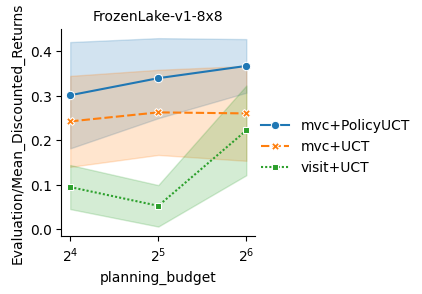

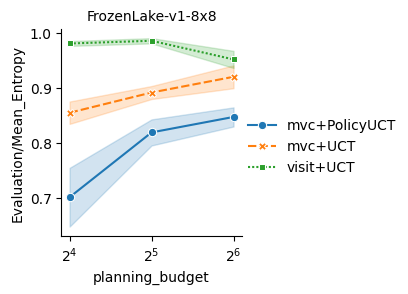

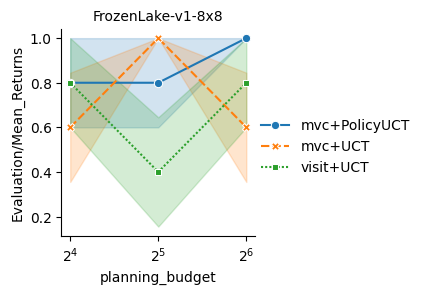

In [23]:



df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']


metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]


estimator = "mean"
for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(df, col="env_description",sharex=True, sharey=False)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    for ax in g.axes.flatten():
        ax.set_xscale('log', base=2)

    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()

    # Set the titles for each subplot for clarity
    g.set_titles("{col_name}")

    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()

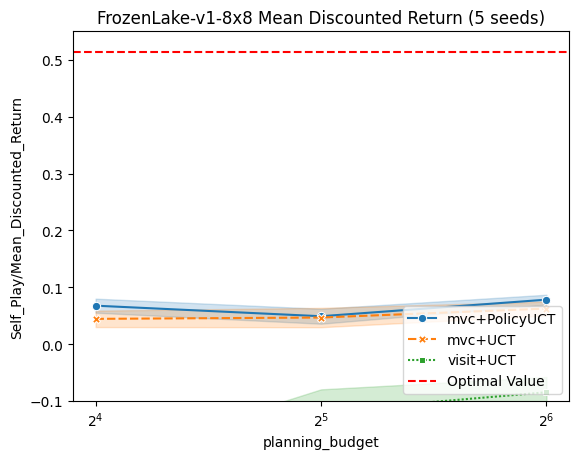

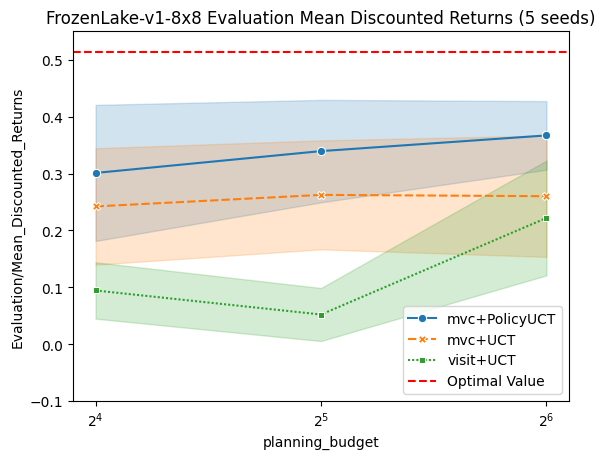

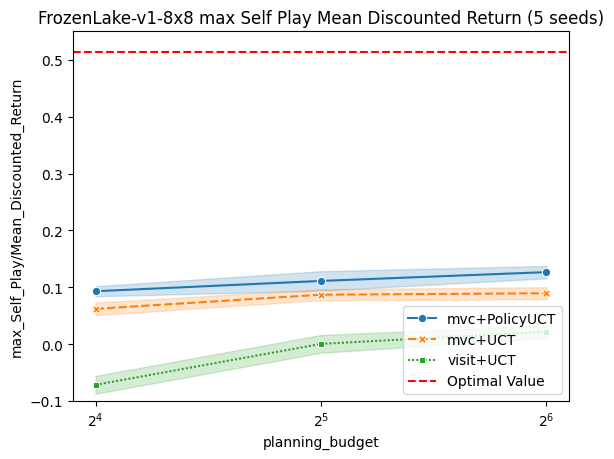

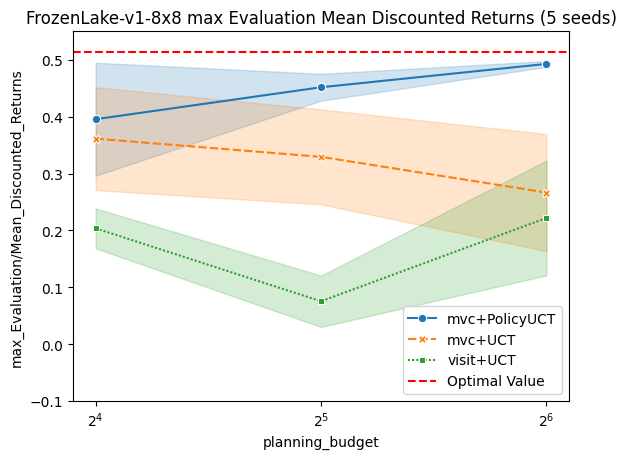

In [25]:

env_description = "FrozenLake-v1-8x8"
runs = df[df["env_description"] == env_description]
optimum_value = runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns",
           "max_Self_Play/Mean_Discounted_Return", "max_Evaluation/Mean_Discounted_Returns"
           ]
# calcualte number of datapoints for each policy_combination and x_metric combination
all_seeds = df.groupby(["policy_combination", x_metric]).size()
assert all_seeds.min() == all_seeds.max(), "Number of seeds is not consistent across policy_combinations and x_metric values"
n_seeds = all_seeds.min()

# plot metric vs x_metric for each policy combination
estimator = "mean"
for metric in metrics:

    # Create a line plot with confidence intervals
    sns.lineplot(data=df,
                 x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

    plt.axhline(optimum_value, color='r', linestyle='--', label='Optimal Value')
    # Customize the plot with titles and labels
    # count the number in each group
    plt.title(f'{env_description} {name_fn(metric)} ({n_seeds} seeds)')
    # set range of y-axis
    plt.ylim(-.1, .55)
    # add line for optimal value

    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(metric)
    plt.gca().set_xscale('log', base=2)
    plt.legend(loc='lower right')

    # save as pdf
    plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_{env_description}_{estimator}.pdf')

    # Show the plot
    plt.show()